In [4]:
import sys
sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")
print(sys.path)

['/Users/aaron/phd/impact-of-contamination-on-taxonomy/notebook/gunc', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python38.zip', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8/lib-dynload', '', '/Users/aaron/.local/lib/python3.8/site-packages', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8/site-packages', '/Users/aaron/phd/impact-of-contamination-on-taxonomy']
['/Users/aaron/phd/impact-of-contamination-on-taxonomy/notebook/gunc', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python38.zip', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8/lib-dynload', '', '/Users/aaron/.local/lib/python3.8/site-packages', '/Users/aaron/mambaforge/envs/gunc-chimeras/lib/python3.8/site-packages', '/Users/aaron/phd/impact-of-contamination-on-taxonomy', '/Users/aaron/phd/impact-of-contamination-on-taxonomy']


In [10]:
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
import matplotlib.pyplot as plt
import seaborn as sns
from workflow.external.gtdb_metadata import GtdbMetadataR207
from collections import defaultdict


In [9]:
DF_CSS = AggregateMaxCssLevelMerged().output().read_cached()
DF_CSS.head()

,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [8]:
DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [16]:
S_FAILED_GIDS = frozenset(DF_CSS.index)
print(len(S_FAILED_GIDS))

35723


In [14]:
def generate_sp_to_gids():
    out = defaultdict(set)
    for row in DF_META.itertuples():
        out[row.species].add(row.Index)
    return out
D_SP_TO_GIDS = generate_sp_to_gids()
print(list(D_SP_TO_GIDS.items())[0])

('s__Bacillus_A anthracis', {'GCF_000021785.1', 'GCF_009872895.1', 'GCA_000292565.1', 'GCF_003410355.1', 'GCF_016758535.1', 'GCF_900176915.1', 'GCF_006088855.1', 'GCF_000143605.1', 'GCF_000782955.1', 'GCF_014712235.1', 'GCF_000161695.1', 'GCF_001583855.1', 'GCF_000181835.1', 'GCF_001683175.1', 'GCF_001883895.1', 'GCF_007666385.1', 'GCF_004009875.1', 'GCF_009831675.1', 'GCF_001272985.1', 'GCF_002025415.1', 'GCF_009872925.1', 'GCF_013267795.1', 'GCF_017813895.1', 'GCF_002525785.1', 'GCF_000160915.1', 'GCF_009872975.1', 'GCF_001683295.1', 'GCF_002525705.1', 'GCF_000008165.1', 'GCF_000182055.1', 'GCF_001029875.1', 'GCF_000783165.1', 'GCF_013349245.1', 'GCF_004328845.1', 'GCF_000239195.1', 'GCF_009806655.1', 'GCF_000833065.1', 'GCF_002976415.1', 'GCF_009872815.1', 'GCF_002025345.1', 'GCF_000021445.1', 'GCF_013349185.1', 'GCF_009806595.1', 'GCF_009872875.1', 'GCF_009183765.1', 'GCF_000832635.1', 'GCF_000742655.1', 'GCF_000832485.1', 'GCF_009872795.1', 'GCF_000832505.1', 'GCF_012395345.1', 'G

In [26]:
# Get the count of species that contain any failed genomes
def get_sp_with_failed_genomes():
    out = dict()
    for sp, gids in D_SP_TO_GIDS.items():
        n_failed_gids = len(gids.intersection(S_FAILED_GIDS))
        if n_failed_gids > 0:
            out[sp] = n_failed_gids
    return out
D_SP_WITH_FAILED_GIDS = get_sp_with_failed_genomes()
print(len(D_SP_WITH_FAILED_GIDS))
print(list(D_SP_WITH_FAILED_GIDS.items())[0:5])
print(f'Max: {max(D_SP_WITH_FAILED_GIDS.values())}')

9989
[('s__Bacillus_A anthracis', 1), ('s__Xanthomonas oryzae', 5), ('s__Streptococcus pyogenes', 46), ('s__Rhodopseudomonas pseudopalustris', 1), ('s__Clostridium_P perfringens', 80)]
Max: 3721


(array([7.275e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.354e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 5.020e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.310e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.550e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.800e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        4.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.900e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

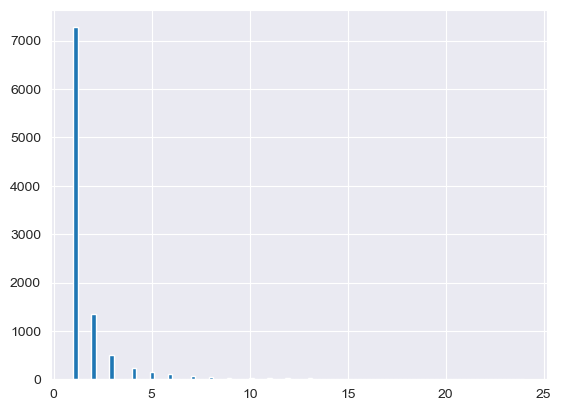

In [32]:
# Create a histogram of the number of genomes that failed in each species
plt.hist([x for x in list(D_SP_WITH_FAILED_GIDS.values()) if x < 25], bins=100)


In [56]:
# If the rep failed, how many failed non-reps are in the species cluster?
def get_data_2():
    out = dict()
    for row in DF_META[DF_META['gtdb_representative'] == 't'].itertuples():
        if row.Index in S_FAILED_GIDS:
            gids = D_SP_TO_GIDS[row.species]
            n_failed_gids = len(gids.intersection(S_FAILED_GIDS))
            out[row.species] = n_failed_gids
    return out

DATA_2 = get_data_2()

In [88]:
[x for x in DATA_2.items() if x[1] > 50]

# TODO TALK ABOUT THESE CASES (mag/iso breakdown)

[('s__Borreliella burgdorferi', 100),
 ('s__Epibacterium mobile', 54),
 ('s__Borreliella garinii', 110)]

<AxesSubplot: ylabel='Count'>

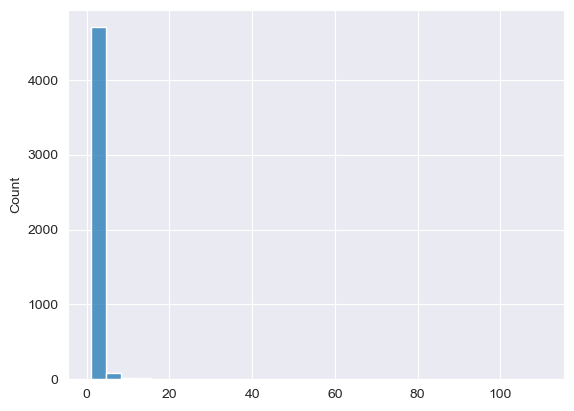

In [65]:
sns.histplot(x=[x for x in DATA_2.values() if x < 9999], bins=30)


In [62]:
# If the rep failed, how many failed non-reps are in the species cluster?
def get_data_3():
    out = dict()
    for row in DF_META[DF_META['gtdb_representative'] == 'f'].itertuples():
        if row.Index in S_FAILED_GIDS:
            gids = D_SP_TO_GIDS[row.species]
            n_failed_gids = len(gids.intersection(S_FAILED_GIDS))
            out[row.species] = n_failed_gids
    return out

DATA_3 = get_data_3()

In [85]:
sum([x[1] for x in sorted(DATA_3.items(), key=lambda x: x[1], reverse=True)][0:100])

18985

In [87]:
[x for x in sorted(DATA_3.items(), key=lambda x: x[1], reverse=True)][0:100]
# TODO (later): Pan genome analysis of core genome for enterobacter fail genomes

[('s__Escherichia coli', 3721),
 ('s__Klebsiella pneumoniae', 3201),
 ('s__Salmonella enterica', 2365),
 ('s__Pseudomonas aeruginosa', 1552),
 ('s__Enterococcus_B faecium', 1218),
 ('s__Enterobacter hormaechei_A', 828),
 ('s__Citrobacter freundii', 283),
 ('s__Listeria monocytogenes_B', 265),
 ('s__Legionella pneumophila', 225),
 ('s__Enterococcus faecalis', 215),
 ('s__Clostridioides difficile', 202),
 ('s__Klebsiella quasipneumoniae', 182),
 ('s__Sinorhizobium meliloti', 169),
 ('s__Bordetella pertussis', 168),
 ('s__Listeria monocytogenes', 168),
 ('s__Cronobacter sakazakii', 127),
 ('s__Vibrio cholerae', 120),
 ('s__Agrobacterium tumefaciens', 120),
 ('s__Proteus mirabilis', 112),
 ('s__Borreliella garinii', 110),
 ('s__Bacteroides uniformis', 107),
 ('s__Borreliella burgdorferi', 100),
 ('s__Mammaliicoccus sciuri', 99),
 ('s__Klebsiella variicola', 96),
 ('s__Ligilactobacillus salivarius', 95),
 ('s__Acinetobacter baumannii', 95),
 ('s__Klebsiella michiganensis', 87),
 ('s__Oenoco

<AxesSubplot: ylabel='Count'>

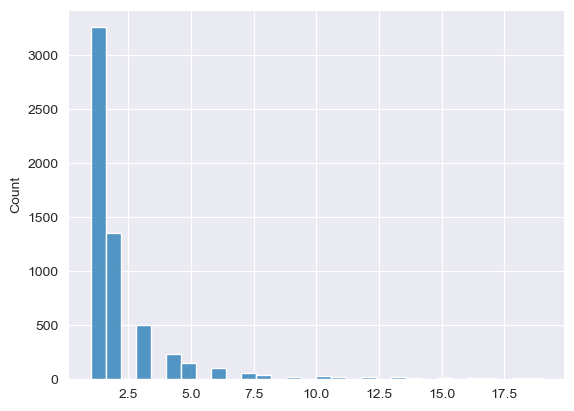

In [70]:
sns.histplot(x=[x for x in DATA_3.values() if x < 20], bins=30)
